## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.9356 - acc: 0.3019 - val_loss: 1.7634 - val_acc: 0.3713
Epoch 2/500
50000/50000 [==============================] - 2s 35us/step - loss: 1.7141 - acc: 0.3885 - val_loss: 1.6469 - val_acc: 0.4087
Epoch 3/500
50000/50000 [==============================] - 2s 35us/step - loss: 1.6247 - acc: 0.4215 - val_loss: 1.5731 - val_acc: 0.4412
Epoch 4/500
50000/50000 [==============================] - 2s 35us/step - loss: 1.5439 - acc: 0.4494 - val_loss: 1.5107 - val_acc: 0.4644
Epoch 5/500
50000/50000 [==============================] - 2s 35us/step - loss: 1.5030 - acc: 0.4647 - val_loss: 1.5005 - val_acc: 0.4695
Epoch 6/500
50000/50000 [==============================] - 2s 35us/step - loss: 1.4650 - acc: 0.4778 - val_loss: 1.4828 - val_acc: 0.4717
Epoch 7/500
50000/50000 [==============================] - 2s 35us/step - 

Epoch 58/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.5600 - acc: 0.8003 - val_loss: 1.9689 - val_acc: 0.5116
Epoch 59/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.5558 - acc: 0.8017 - val_loss: 1.9610 - val_acc: 0.5166
Epoch 60/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.5536 - acc: 0.8023 - val_loss: 2.0060 - val_acc: 0.5136
Epoch 61/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.5508 - acc: 0.8026 - val_loss: 2.0323 - val_acc: 0.5164
Epoch 62/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.5394 - acc: 0.8066 - val_loss: 2.1303 - val_acc: 0.5091
Epoch 63/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.5202 - acc: 0.8145 - val_loss: 2.0780 - val_acc: 0.5179
Epoch 64/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.5068 - acc: 0.8195 - val_loss: 2.1140 - val_acc: 0.5031
Epoch 65/500
50000/50000 [=

Epoch 117/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.2650 - acc: 0.9048 - val_loss: 3.3173 - val_acc: 0.5041
Epoch 118/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.2533 - acc: 0.9084 - val_loss: 3.4290 - val_acc: 0.4886
Epoch 119/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.2430 - acc: 0.9140 - val_loss: 3.2625 - val_acc: 0.5028
Epoch 120/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.2139 - acc: 0.9245 - val_loss: 3.4636 - val_acc: 0.5050
Epoch 121/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.2488 - acc: 0.9095 - val_loss: 3.4072 - val_acc: 0.4996
Epoch 122/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2388 - acc: 0.9138 - val_loss: 3.4264 - val_acc: 0.4995
Epoch 123/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.2495 - acc: 0.9108 - val_loss: 3.3971 - val_acc: 0.4933
Epoch 124/500
50000/

50000/50000 [==============================] - 2s 35us/step - loss: 0.1617 - acc: 0.9424 - val_loss: 4.1371 - val_acc: 0.5010
Epoch 176/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1515 - acc: 0.9468 - val_loss: 4.0671 - val_acc: 0.4952
Epoch 177/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1339 - acc: 0.9522 - val_loss: 4.1429 - val_acc: 0.4950
Epoch 178/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.2217 - acc: 0.9237 - val_loss: 4.1149 - val_acc: 0.4957
Epoch 179/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1545 - acc: 0.9460 - val_loss: 4.1846 - val_acc: 0.4954
Epoch 180/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1479 - acc: 0.9481 - val_loss: 4.2335 - val_acc: 0.4949
Epoch 181/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1960 - acc: 0.9321 - val_loss: 4.2055 - val_acc: 0.4898
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 2s 36us/step - loss: 0.1638 - acc: 0.9438 - val_loss: 4.6385 - val_acc: 0.4806
Epoch 234/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2096 - acc: 0.9304 - val_loss: 4.4870 - val_acc: 0.4866
Epoch 235/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1403 - acc: 0.9515 - val_loss: 4.4993 - val_acc: 0.4973
Epoch 236/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1261 - acc: 0.9553 - val_loss: 4.4592 - val_acc: 0.5032
Epoch 237/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1055 - acc: 0.9635 - val_loss: 4.5908 - val_acc: 0.4982
Epoch 238/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1125 - acc: 0.9605 - val_loss: 4.5242 - val_acc: 0.5024
Epoch 239/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1073 - acc: 0.9621 - val_loss: 4.5408 - val_acc: 0.4936
Epoch 240/500
50000/50000 [=======

50000/50000 [==============================] - 2s 35us/step - loss: 0.0526 - acc: 0.9823 - val_loss: 4.7889 - val_acc: 0.4975
Epoch 292/500
50000/50000 [==============================] - 2s 36us/step - loss: 0.1065 - acc: 0.9640 - val_loss: 4.9030 - val_acc: 0.4862
Epoch 293/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1978 - acc: 0.9387 - val_loss: 4.8369 - val_acc: 0.4842
Epoch 294/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1986 - acc: 0.9365 - val_loss: 4.7106 - val_acc: 0.4847
Epoch 295/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1246 - acc: 0.9577 - val_loss: 4.8245 - val_acc: 0.4925
Epoch 296/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.0709 - acc: 0.9762 - val_loss: 4.7463 - val_acc: 0.4998
Epoch 297/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.0613 - acc: 0.9797 - val_loss: 4.8669 - val_acc: 0.4925
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 2s 36us/step - loss: 0.0993 - acc: 0.9660 - val_loss: 5.0723 - val_acc: 0.4860
Epoch 350/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1393 - acc: 0.9546 - val_loss: 4.9763 - val_acc: 0.4898
Epoch 351/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.0741 - acc: 0.9746 - val_loss: 4.9460 - val_acc: 0.4986
Epoch 352/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.0834 - acc: 0.9721 - val_loss: 5.0570 - val_acc: 0.4867
Epoch 353/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.0600 - acc: 0.9793 - val_loss: 5.0897 - val_acc: 0.4879
Epoch 354/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1536 - acc: 0.9513 - val_loss: 5.1439 - val_acc: 0.4800
Epoch 355/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1674 - acc: 0.9466 - val_loss: 4.9426 - val_acc: 0.4949
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 2s 35us/step - loss: 0.0219 - acc: 0.9936 - val_loss: 5.0164 - val_acc: 0.5053
Epoch 408/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.0306 - acc: 0.9903 - val_loss: 5.0003 - val_acc: 0.4994
Epoch 409/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.2421 - acc: 0.9311 - val_loss: 5.0062 - val_acc: 0.4794
Epoch 410/500
50000/50000 [==============================] - 2s 36us/step - loss: 0.1877 - acc: 0.9422 - val_loss: 4.8916 - val_acc: 0.4920
Epoch 411/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.0796 - acc: 0.9738 - val_loss: 4.9719 - val_acc: 0.4986
Epoch 412/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.0515 - acc: 0.9817 - val_loss: 5.0311 - val_acc: 0.4990
Epoch 413/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.0283 - acc: 0.9909 - val_loss: 4.9930 - val_acc: 0.5029
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 2s 35us/step - loss: 0.0209 - acc: 0.9935 - val_loss: 5.2290 - val_acc: 0.4996
Epoch 466/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.0174 - acc: 0.9947 - val_loss: 5.2757 - val_acc: 0.5006
Epoch 467/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.1267 - acc: 0.9620 - val_loss: 5.2818 - val_acc: 0.4858
Epoch 468/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.2501 - acc: 0.9325 - val_loss: 5.1905 - val_acc: 0.4936
Epoch 469/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.0663 - acc: 0.9784 - val_loss: 5.2291 - val_acc: 0.4980
Epoch 470/500
50000/50000 [==============================] - 2s 36us/step - loss: 0.0471 - acc: 0.9841 - val_loss: 5.2037 - val_acc: 0.4986
Epoch 471/500
50000/50000 [==============================] - 2s 36us/step - loss: 0.0239 - acc: 0.9924 - val_loss: 5.2285 - val_acc: 0.5009
Epoch 472/500
50000/50000 [=======

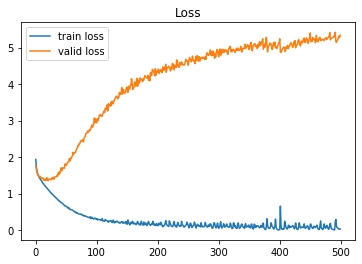

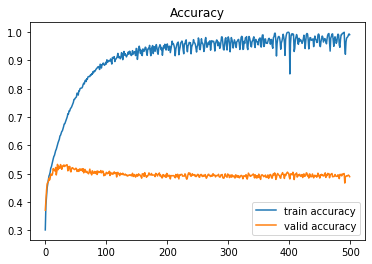

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.8670 - acc: 0.3327 - val_loss: 1.7831 - val_acc: 0.3633
Epoch 2/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.6499 - acc: 0.4174 - val_loss: 1.6429 - val_acc: 0.4146
Epoch 3/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.5544 - acc: 0.4472 - val_loss: 1.7158 - val_acc: 0.3847
Epoch 4/500
50000/50000 [==============================] - 2s 34us/step - loss: 1.4895 - acc: 0.4714 - val_loss: 1.5142 - val_acc: 0.4558
Epoch 5/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.4421 - acc: 0.4885 - val_loss: 1.5070 - val_acc: 0.4638
Epoch 6/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.4070 - acc: 0.4997 - val_loss: 1.4834 - val_acc: 0.4695
Epoch 7/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.3599 - acc: 0.5180 - val_loss: 1.5674 - 

50000/50000 [==============================] - 2s 32us/step - loss: 0.2985 - acc: 0.8957 - val_loss: 2.2600 - val_acc: 0.5218
Epoch 60/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.3134 - acc: 0.8888 - val_loss: 2.3695 - val_acc: 0.5119
Epoch 61/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.2787 - acc: 0.9020 - val_loss: 2.2670 - val_acc: 0.5338
Epoch 62/500
50000/50000 [==============================] - 2s 32us/step - loss: 0.2711 - acc: 0.9040 - val_loss: 2.4159 - val_acc: 0.5161
Epoch 63/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.2676 - acc: 0.9052 - val_loss: 2.4608 - val_acc: 0.5119
Epoch 64/500
50000/50000 [==============================] - 2s 32us/step - loss: 0.2552 - acc: 0.9100 - val_loss: 2.5427 - val_acc: 0.5243
Epoch 65/500
50000/50000 [==============================] - 2s 34us/step - loss: 0.2377 - acc: 0.9179 - val_loss: 2.4587 - val_acc: 0.5253
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.0668 - acc: 0.9770 - val_loss: 3.4753 - val_acc: 0.5363
Epoch 119/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.0817 - acc: 0.9716 - val_loss: 3.7113 - val_acc: 0.5262
Epoch 120/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.1189 - acc: 0.9587 - val_loss: 3.6254 - val_acc: 0.5252
Epoch 121/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.1246 - acc: 0.9560 - val_loss: 3.6463 - val_acc: 0.5220
Epoch 122/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.0993 - acc: 0.9655 - val_loss: 3.7756 - val_acc: 0.5205
Epoch 123/500
50000/50000 [==============================] - 2s 32us/step - loss: 0.0976 - acc: 0.9660 - val_loss: 3.6953 - val_acc: 0.5200
Epoch 124/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.0762 - acc: 0.9734 - val_loss: 3.5706 - val_acc: 0.5329
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 32us/step - loss: 0.0391 - acc: 0.9869 - val_loss: 4.1472 - val_acc: 0.5307
Epoch 177/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.0339 - acc: 0.9880 - val_loss: 4.0808 - val_acc: 0.5344
Epoch 178/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.0305 - acc: 0.9900 - val_loss: 4.0688 - val_acc: 0.5345
Epoch 179/500
50000/50000 [==============================] - 2s 32us/step - loss: 0.0365 - acc: 0.9874 - val_loss: 4.1009 - val_acc: 0.5330
Epoch 180/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.0373 - acc: 0.9868 - val_loss: 4.1693 - val_acc: 0.5334
Epoch 181/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.0625 - acc: 0.9786 - val_loss: 4.1557 - val_acc: 0.5284
Epoch 182/500
50000/50000 [==============================] - 2s 33us/step - loss: 0.0894 - acc: 0.9698 - val_loss: 4.0062 - val_acc: 0.5361
Epoch 183/500
50000/50000 [=======

Epoch 234/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.3947e-04 - acc: 1.0000 - val_loss: 4.2290 - val_acc: 0.5527
Epoch 235/500
50000/50000 [==============================] - 2s 32us/step - loss: 1.3874e-04 - acc: 1.0000 - val_loss: 4.2295 - val_acc: 0.5521
Epoch 236/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.3572e-04 - acc: 1.0000 - val_loss: 4.2312 - val_acc: 0.5527
Epoch 237/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.3364e-04 - acc: 1.0000 - val_loss: 4.2333 - val_acc: 0.5529
Epoch 238/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.3151e-04 - acc: 1.0000 - val_loss: 4.2351 - val_acc: 0.5521
Epoch 239/500
50000/50000 [==============================] - 2s 33us/step - loss: 1.3144e-04 - acc: 1.0000 - val_loss: 4.2351 - val_acc: 0.5530
Epoch 240/500
50000/50000 [==============================] - 2s 34us/step - loss: 1.2739e-04 - acc: 1.0000 - val_loss: 4.2390 - val_acc:

Epoch 291/500
50000/50000 [==============================] - 2s 33us/step - loss: 7.8829e-05 - acc: 1.0000 - val_loss: 4.2984 - val_acc: 0.5525
Epoch 292/500
50000/50000 [==============================] - 2s 32us/step - loss: 7.8160e-05 - acc: 1.0000 - val_loss: 4.2998 - val_acc: 0.5526
Epoch 293/500
50000/50000 [==============================] - 2s 32us/step - loss: 7.7919e-05 - acc: 1.0000 - val_loss: 4.2995 - val_acc: 0.5525
Epoch 294/500
50000/50000 [==============================] - 2s 32us/step - loss: 7.7163e-05 - acc: 1.0000 - val_loss: 4.3008 - val_acc: 0.5527
Epoch 295/500
50000/50000 [==============================] - 2s 32us/step - loss: 7.6817e-05 - acc: 1.0000 - val_loss: 4.3017 - val_acc: 0.5525
Epoch 296/500
50000/50000 [==============================] - 2s 32us/step - loss: 7.6334e-05 - acc: 1.0000 - val_loss: 4.3021 - val_acc: 0.5528
Epoch 297/500
50000/50000 [==============================] - 2s 32us/step - loss: 7.5938e-05 - acc: 1.0000 - val_loss: 4.3031 - val_acc:

Epoch 348/500
50000/50000 [==============================] - 2s 34us/step - loss: 5.8140e-05 - acc: 1.0000 - val_loss: 4.3370 - val_acc: 0.5528
Epoch 349/500
50000/50000 [==============================] - 2s 33us/step - loss: 5.7892e-05 - acc: 1.0000 - val_loss: 4.3375 - val_acc: 0.5528
Epoch 350/500
50000/50000 [==============================] - 2s 33us/step - loss: 5.7573e-05 - acc: 1.0000 - val_loss: 4.3373 - val_acc: 0.5530
Epoch 351/500
50000/50000 [==============================] - 2s 33us/step - loss: 5.7390e-05 - acc: 1.0000 - val_loss: 4.3376 - val_acc: 0.5531
Epoch 352/500
50000/50000 [==============================] - 2s 33us/step - loss: 5.7069e-05 - acc: 1.0000 - val_loss: 4.3383 - val_acc: 0.5532
Epoch 353/500
50000/50000 [==============================] - 2s 33us/step - loss: 5.6914e-05 - acc: 1.0000 - val_loss: 4.3390 - val_acc: 0.5529
Epoch 354/500
50000/50000 [==============================] - 2s 33us/step - loss: 5.6748e-05 - acc: 1.0000 - val_loss: 4.3399 - val_acc:

Epoch 405/500
50000/50000 [==============================] - 2s 32us/step - loss: 4.6885e-05 - acc: 1.0000 - val_loss: 4.3634 - val_acc: 0.5530
Epoch 406/500
50000/50000 [==============================] - 2s 32us/step - loss: 4.6780e-05 - acc: 1.0000 - val_loss: 4.3640 - val_acc: 0.5536
Epoch 407/500
50000/50000 [==============================] - 2s 32us/step - loss: 4.6570e-05 - acc: 1.0000 - val_loss: 4.3640 - val_acc: 0.5531
Epoch 408/500
50000/50000 [==============================] - 2s 32us/step - loss: 4.6482e-05 - acc: 1.0000 - val_loss: 4.3648 - val_acc: 0.5537
Epoch 409/500
50000/50000 [==============================] - 2s 32us/step - loss: 4.6290e-05 - acc: 1.0000 - val_loss: 4.3650 - val_acc: 0.5534
Epoch 410/500
50000/50000 [==============================] - 2s 33us/step - loss: 4.6147e-05 - acc: 1.0000 - val_loss: 4.3654 - val_acc: 0.5532
Epoch 411/500
50000/50000 [==============================] - 2s 33us/step - loss: 4.6009e-05 - acc: 1.0000 - val_loss: 4.3654 - val_acc:

Epoch 462/500
50000/50000 [==============================] - 2s 34us/step - loss: 3.9709e-05 - acc: 1.0000 - val_loss: 4.3845 - val_acc: 0.5531
Epoch 463/500
50000/50000 [==============================] - 2s 33us/step - loss: 3.9590e-05 - acc: 1.0000 - val_loss: 4.3846 - val_acc: 0.5534
Epoch 464/500
50000/50000 [==============================] - 2s 32us/step - loss: 3.9487e-05 - acc: 1.0000 - val_loss: 4.3848 - val_acc: 0.5539
Epoch 465/500
50000/50000 [==============================] - 2s 33us/step - loss: 3.9474e-05 - acc: 1.0000 - val_loss: 4.3852 - val_acc: 0.5534
Epoch 466/500
50000/50000 [==============================] - 2s 32us/step - loss: 3.9311e-05 - acc: 1.0000 - val_loss: 4.3857 - val_acc: 0.5540
Epoch 467/500
50000/50000 [==============================] - 2s 34us/step - loss: 3.9233e-05 - acc: 1.0000 - val_loss: 4.3859 - val_acc: 0.5534
Epoch 468/500
50000/50000 [==============================] - 2s 33us/step - loss: 3.9118e-05 - acc: 1.0000 - val_loss: 4.3861 - val_acc:

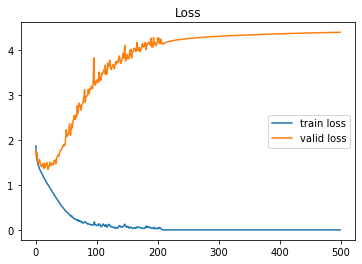

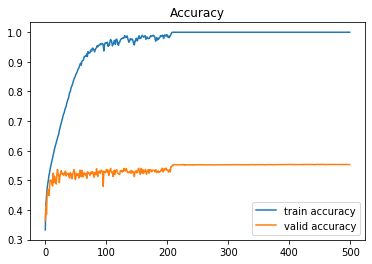

In [10]:
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model = build_mlp()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()